# Guide to import JWST Time-series Observations as stingray Lightcurve objects

Author: Ping Hei Ng

## Downloads and imports

For quick queries, we can use the astroquery package in python. To download, please follow the instructions on:

https://astroquery.readthedocs.io/en/latest/#installation. 

In [1]:
# Import packages
from astroquery.mast import Mast
from astroquery.mast import Observations
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from stingray import Lightcurve

### Make a query and download data

In [2]:
# Make a query with desired criteria
#e.g. instrument name (put * after instrument name to use wildcards), name of Principal Investigator, proposal ID
obs_list = Observations.query_criteria(instrument_name="NIRCam*", proposal_pi='Pirzkal, Norbert', proposal_id='1076')

# Examine the columns if needed
#print(obs_list.columns)
# Check the name of your desired target with its corresponding observation id if needed
#print(obs_list['obsid', 'target_name'])



In [3]:
%%time
# Obtain the data by its observation id (use the first file as an example)
file_list = Observations.get_product_list(obs_list[0]['obsid'])
# Download the files to a new local folder (this takes a while)
file = Observations.download_products(file_list, productType="SCIENCE")

INFO: Found cached file ./mastDownload/JWST/jw01076-o014_t002_nircam_f444w-grismr-subgrism256/jw01076-o014_t002_nircam_f444w-grismr-subgrism256_whtlt.ecsv with expected size 826. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01076-o014_t002_nircam_f444w-grismr-subgrism256/jw01076-o014_t002_nircam_f444w-grismr-subgrism256_x1dints.fits with expected size 3965760. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01076014001_02102_00001-seg001_nrcalong/jw01076014001_02102_00001-seg001_nrcalong_cal.fits with expected size 123840. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01076014001_02102_00001-seg001_nrcalong/jw01076014001_02102_00001-seg001_nrcalong_rate.fits with expected size 83520. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01076014001_02102_00001-seg001_nrcalong/jw01076014001_02102_00001-seg001_nrcalong_rateints.fits with expected size 89280. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/j

### Open files and load light curves

Text(0.5, 1.0, 'Example JWST Grism light curves')

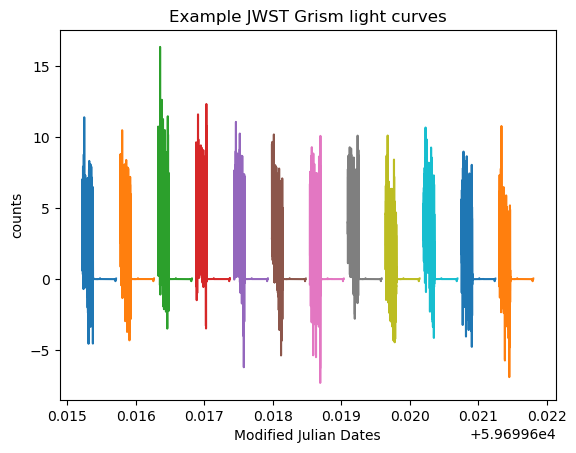

In [9]:
# Open one of the downloaded fits file as an example
filename = file[1]['Local Path'] 
hdul = fits.open(filename)

# Print the information of the file to check if needed
#print(hdul.info())

# Load the corresponding fluxes for each exposure
data = [(hdul[2+i].data)['FLUX'] for i in range(len(time))]

# Create a time array using the start and end time (in Modified Julian Date (MJD)) for each exposure: 
time = hdul['INT_TIMES'].data
time_start = [time[i]['int_start_MJD_UTC'] for i in range(len(time))]
time_end = [time[i]['int_end_MJD_UTC'] for i in range(len(time))]
time_arr = [np.linspace(time_start[i], time_end[i], len(data[i]))for i in range(len(time))]

# Create a list of stingray light curve objects for analysis
lc = [Lightcurve(time=time_arr[i], counts=data[i]) for i in range(len(time))]

for i in range(len(lc)):
    lc[i].plot()

plt.xlabel('Modified Julian Dates')
plt.title('Example JWST Grism light curves')

Note: This is only an example using an arbitrary NIRCam grism time-series observation. For specific light curves and quantites (e.g. uncertainties of the fluxes), please amend the cell above. 